# **WINE CASE: Explanatory Data Analysis**

* **Objetivo**: prever o potencial de guarda de um determinado vinho
> tempo máximo de armazenamento pós-produção

### **Importando e lendo o database**

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine_db = sqlite3.connect('wine.db')
cursor = wine_db.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('ficha_tecnica',), ('harmonizacao',), ('price',), ('review_rating',), ('sommelier',)]


## **Ficha técnica dos vinhos**

In [3]:
ficha_df = pd.read_sql_query("SELECT * from ficha_tecnica", wine_db)

In [4]:
ficha_df.keys()

Index(['sku', 'tipo', 'uva', 'pais', 'regiao', 'vinicola', 'teor_alcoolico',
       'amadurecimento', 'classificacao', 'visual', 'aroma', 'gosto',
       'temperatura', 'potencial_de_guarda'],
      dtype='object')

* Ficha técnica com detalhes sobre os vinhos

In [5]:
ficha_df.head()

,sku,tipo,uva,pais,regiao,vinicola,teor_alcoolico,amadurecimento,classificacao,visual,aroma,gosto,temperatura,potencial_de_guarda
0,10839,Espumante,"Chardonnay, Glera, Pinot Bianco",Itália,Friuli,Fantinel,11.50% ABV,Em tanques de aço inox,Brut,Amarelo-palha com reflexos esverdeados,"Maçã, flores brancas","Leve, fresco, floral, frutado, acidez agradável",8 °C,4 anos
1,11549,Branco,Furmint (100%),Hungria,Tokaj,Pajzos,11.00% ABV,Sem passagem por carvalho.,Suave/Doce,Amarelo dourado,"Frutas brancas maduras, mel, figo seco, frutas...","Doce, equilibrado, acidez agradável, final longo",10 °C,15 anos
2,11610,Espumante,"Chenin Blanc (60%), Chardonnay (40%)",Argentina,Mendoza,Finca La Chamiza,12.00% ABV,1 mês sobre as borras.,Brut,Amarelo,"Frutas amarelas maduras, toque de fermento","Maduro, leve, acidez agradável, delicada cremo...",8 °C,3 anos
3,11982,Licoroso,Nero d'Avola,Itália,Marsala,Cantine Pellegrino,18.00% ABV,Mais de um ano em barricas,Suave/Doce,Rubi com reflexos âmbar.,"Frutas negras em compota, frutas secas, carame...","Levemente adocicado, taninos leves e sabor int...",12 °C,6 anos
4,11983,Licoroso,"Catarratto, Grillo",Itália,Marsala,Cantine Pellegrino,18.00% ABV,4 anos em barris de carvalho.,Suave/Doce,Ouro intenso com reflexos âmbar.,"Frutas cristalizadas, casca de laranja, baunil...","Doce, macio, cheio e persistente.",12 °C,8 anos


## **Harmonização**

In [6]:
harmonizacao_df = pd.read_sql_query("SELECT * from harmonizacao", wine_db)
harmonizacao_df.head()

,sku,harmonizacao
0,10839,"[Bruschettas, camarões salteados, arroz de pol..."
1,11549,"[Pavê de pêssegos em calda, peras cozidas em e..."
2,11610,"[Canapés e bruschettas, penne ao molho branco,..."
3,11982,"[Cuca de frutas secas, panetone, cheesecake, c..."
4,11983,[Vinho de meditação ou aperitivo. Ideal com so...


* Um exemplo de harmonização: pratos que podem acompanhar os vinhos

In [7]:
print(harmonizacao_df['harmonizacao'][0])

[Bruschettas, camarões salteados, arroz de polvo, bolinho de bacalhau, lasanha de peito de peru, penne à primavera.]


* Não esperamos que haja um relação lógica entre a harmonização e o potencial de guarda
> Logo, não vamos usar este dataframe a priori

## **Preços**

In [8]:
price_df = pd.read_sql_query("SELECT * from price", wine_db)
price_df.head()

,sku,price_non_partner,price_partner
0,10839,51.92,44.13
1,11549,504.70,429.00
2,11610,59.90,43.73
3,11982,132.90,112.97
4,11983,180.00,153.00


## **Review rating**

In [9]:
rating_df = pd.read_sql_query("SELECT * from review_rating", wine_db)
rating_df.head()

,sku,reviewCount,ratingValue
0,10839,178.0,4.0
1,11549,,
2,11610,25.0,3.5
3,11982,5.0,3.5
4,11983,7.0,4.0


* Os preços e as avaliações podem nos dar informações indiretamente sobre o potencial de guarda
> Vamos analisar essas features posteriormente

## **Sommelier's comment**

In [10]:
sommelier_df = pd.read_sql_query("SELECT * from sommelier", wine_db)
sommelier_df.head()

,sku,sommelier_comment
0,10839,[\n Espumante italiano com ar...
1,11549,[\n Trata-se de uma novidade ...
2,11610,[\n Esse espumante elaborado ...
3,11982,[\n Esse exemplar com aromas ...
4,11983,"[\n Doce, macio, cheio e pers..."


In [11]:
print("Sommelier's comment:", sommelier_df['sommelier_comment'][0])
print('Aroma:', ficha_df['aroma'][0])
print('Gosto:', ficha_df['gosto'][0])
print('Visual:', ficha_df['visual'][0])

Sommelier's comment: [
                  Espumante italiano com aromas de maçã e flores brancas. No paladar, é leve, fresco, mostra as notas frutadas e florais do aroma. Esse exemplar é elaborado pelo método Charmat, para destacar notas frescas e a gostosa acidez. É ideal para harmonizar das entradas aos pratos principais.   
              ]
Aroma: Maçã, flores brancas
Gosto: Leve, fresco, floral, frutado, acidez agradável
Visual: Amarelo-palha com reflexos esverdeados


In [12]:
print("Sommelier's comment:", sommelier_df['sommelier_comment'][1])
print('Aroma:', ficha_df['aroma'][1])
print('Gosto:', ficha_df['gosto'][1])
print('Visual:', ficha_df['visual'][1])

Sommelier's comment: [
                  Trata-se de uma novidade recente, um Icewine - vinho produzido com uvas que congelaram antes de serem colhidas, elaborado no império dos Tokaji, vinhos doces de tradição secular. Um pioneirismo do Chateau Pajzos, que só conseguiu elaborar 2 Icewine na região de Tokaj, este sendo o segundo, que além de tudo foi pontuado por Robert Parker.
              ]
Aroma: Frutas brancas maduras, mel, figo seco, frutas cítricas, chá, floral, mineral, nozes
Gosto: Doce, equilibrado, acidez agradável, final longo
Visual: Amarelo dourado


In [13]:
print("Sommelier's comment:", sommelier_df['sommelier_comment'][2])
print('Aroma:', ficha_df['aroma'][2])
print('Gosto:', ficha_df['gosto'][2])
print('Visual:', ficha_df['visual'][2])

Sommelier's comment: [
                  Esse espumante elaborado pelo método Charmat, é produzido pela Finca La Chamiza, uma vinícola-boutique argentina que integra um projeto da gigante Concha Y Toro. Inaugurada em Mendoza, em 2003, seus vinhedos ocupam a área de um antigo e histórico haras, onde o jogo de polo foi introduzido na Argentina.
              ]
Aroma: Frutas amarelas maduras, toque de fermento
Gosto: Maduro, leve, acidez agradável, delicada cremosidade
Visual: Amarelo


* O comentário do sommelier já contém as informações de aroma, gosto, visual
* São informações subjetivas e superficiais em forma de texto
> Logo, são de díficil análise e não devem contribuir muito nos modelos preditivos

 # **Target feature: potencial de guarda**

In [14]:
ficha_df['potencial_de_guarda'].head(10)

0     4 anos
1    15 anos
2     3 anos
3     6 anos
4     8 anos
5     8 anos
6     3 anos
7     3 anos
8     3 anos
9     3 anos
Name: potencial_de_guarda, dtype: object

In [15]:
ficha_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sku                  853 non-null    object
 1   tipo                 853 non-null    object
 2   uva                  853 non-null    object
 3   pais                 853 non-null    object
 4   regiao               853 non-null    object
 5   vinicola             853 non-null    object
 6   teor_alcoolico       853 non-null    object
 7   amadurecimento       853 non-null    object
 8   classificacao        853 non-null    object
 9   visual               853 non-null    object
 10  aroma                853 non-null    object
 11  gosto                853 non-null    object
 12  temperatura          853 non-null    object
 13  potencial_de_guarda  853 non-null    object
dtypes: object(14)
memory usage: 93.4+ KB


* **Não há missing values**
* **A feature é não-numérica**
* * precisamos converte-la para um objeto numérico

In [16]:
pot_anos = []

for pot_string in ficha_df['potencial_de_guarda']:
    if ('ano' not in pot_string):
        print('ERROR: potencial_de_guarda nao esta em anos:')
        print(pot_string)
    else:
        pot_anos.append(pot_string.strip('anos '))
        
pot_anos = np.array(pot_anos, 'int')
ficha_df['potencial_de_guarda_anos'] = pot_anos        

In [17]:
ficha_df['potencial_de_guarda_anos'].describe()

count    853.000000
mean       6.330598
std        4.926785
min        1.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       50.000000
Name: potencial_de_guarda_anos, dtype: float64

/home/anderson/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Potencial de guarda em anos')

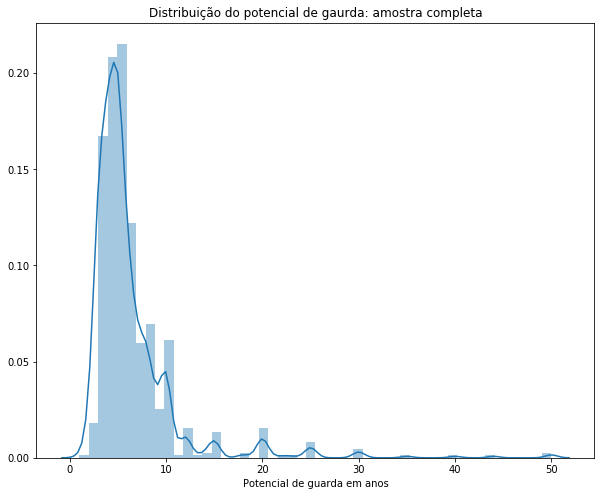

In [18]:
plt.figure(figsize=(10,8))
sns.distplot(ficha_df['potencial_de_guarda_anos'])
plt.title('Distribuição do potencial de gaurda: amostra completa')
plt.xlabel('Potencial de guarda em anos')

## **Tipos de vinho**

In [19]:
tipos = ficha_df.groupby('tipo')['potencial_de_guarda_anos']
tipos.describe()

,count,mean,std,min,25%,50%,75%,max
tipo,,,,,,,,
Branco,176.0,4.232955,1.932354,2.0,3.00,4.0,4.00,15.0
Espumante,106.0,5.330189,5.214854,2.0,3.00,4.0,5.00,44.0
Frisante,4.0,1.750000,0.500000,1.0,1.75,2.0,2.00,2.0
Licoroso,10.0,12.700000,13.784452,5.0,6.50,8.0,8.75,50.0
Rosé,21.0,3.380952,0.589592,2.0,3.00,3.0,4.00,4.0
Tinto,536.0,7.248134,5.013999,2.0,5.00,6.0,8.00,50.0


Text(0.5, 1.0, '')

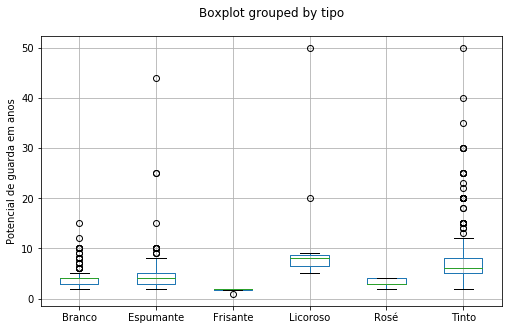

In [20]:
ficha_df.boxplot(['potencial_de_guarda_anos'], by=['tipo'], figsize=(8,5))
plt.xlabel(None)
plt.ylabel('Potencial de guarda em anos')
plt.title('')

Text(0, 0.5, 'Contagem de vinhos')

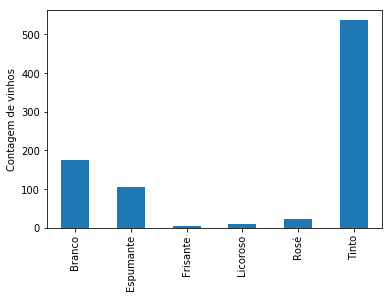

In [21]:
tipos.count().plot.bar()
plt.xlabel(None)
plt.ylabel('Contagem de vinhos')

In [22]:
percentual_tipo = 100*tipos.count()/tipos.count().sum()
percentual_tipo.sort_values(inplace=True, ascending=False)
percentual_tipo

tipo
Tinto        62.837046
Branco       20.633060
Espumante    12.426729
Rosé          2.461899
Licoroso      1.172333
Frisante      0.468933
Name: potencial_de_guarda_anos, dtype: float64

Text(0.5, 1.0, 'Amostra completa de vinhos')

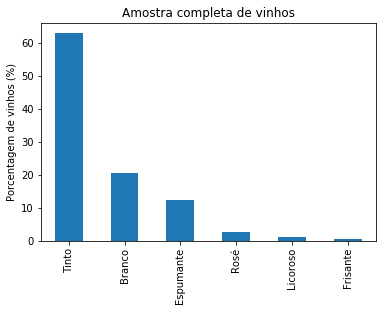

In [23]:
percentual_tipo.sort_values(inplace=True, ascending=False)
percentual_tipo.plot.bar()
plt.xlabel(None)
plt.ylabel('Porcentagem de vinhos (%)')
plt.title('Amostra completa de vinhos')

Text(0, 0.5, 'Potencial de guarda médio')

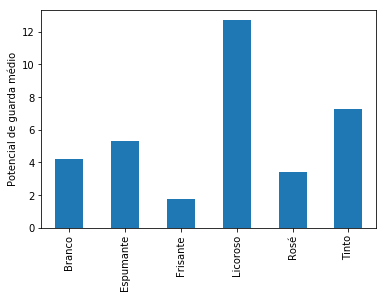

In [24]:
tipos.mean().plot.bar()
plt.xlabel(None)
plt.ylabel('Potencial de guarda médio')

* Os vinhos branco, espumante, frisante e rosé tem 50% da amostra com potencial de guarda entre 1 e 5 anos
* Os vinhos licoroso e tinto possuem as maiores médias de potencial de guarda
* Os vinhos espumante, licoroso e tinto têm as maiores máximas de potencial de guarda
* Os vinhos frisante, licoroso e rosé têm baixa contagem
* * potencial de guarda médio e std não são significativos
* * devemos analisar os outliers!

### **Análise dos outliers por tipo de vinho**

In [25]:
Q1, Q2, Q3 = tipos.quantile(0.25), tipos.quantile(0.5), tipos.quantile(0.75)
IIQ = Q3 - Q1
lower_lim = Q1 - 1.5*IIQ
upper_lim = Q1 + 1.5*IIQ

In [26]:
lower_lim

tipo
Branco       1.500
Espumante    0.000
Frisante     1.375
Licoroso     3.125
Rosé         1.500
Tinto        0.500
Name: potencial_de_guarda_anos, dtype: float64

In [27]:
upper_lim

tipo
Branco       4.500
Espumante    6.000
Frisante     2.125
Licoroso     9.875
Rosé         4.500
Tinto        9.500
Name: potencial_de_guarda_anos, dtype: float64

In [28]:
tipos_inside = pd.DataFrame()
tipos_outside = pd.DataFrame()

for tipo in tipos.groups.keys():
    selection_in = (ficha_df['tipo'] == tipo) & (ficha_df['potencial_de_guarda_anos'] >= lower_lim[tipo]) & (ficha_df['potencial_de_guarda_anos'] <= upper_lim[tipo])
    selection_out = (ficha_df['tipo'] == tipo) & ((ficha_df['potencial_de_guarda_anos'] < lower_lim[tipo]) | (ficha_df['potencial_de_guarda_anos'] > upper_lim[tipo]))
    tipos_inside = pd.concat([tipos_inside, ficha_df[selection_in]])
    tipos_outside = pd.concat([tipos_outside, ficha_df[selection_out]])

### **Dataframe sem os outliers por tipo de vinho**

In [29]:
tipos_in = tipos_inside.groupby('tipo')['potencial_de_guarda_anos']

In [30]:
tipos_in.describe()

,count,mean,std,min,25%,50%,75%,max
tipo,,,,,,,,
Branco,136.0,3.426471,0.591700,2.0,3.00,3.0,4.0,4.0
Espumante,89.0,3.808989,1.043120,2.0,3.00,4.0,4.0,6.0
Frisante,3.0,2.000000,0.000000,2.0,2.00,2.0,2.0,2.0
Licoroso,8.0,7.125000,1.552648,5.0,5.75,8.0,8.0,9.0
Rosé,21.0,3.380952,0.589592,2.0,3.00,3.0,4.0,4.0
Tinto,443.0,5.559819,1.480770,2.0,5.00,5.0,6.0,9.0


Text(0.5, 1.0, 'Outliers removidos')

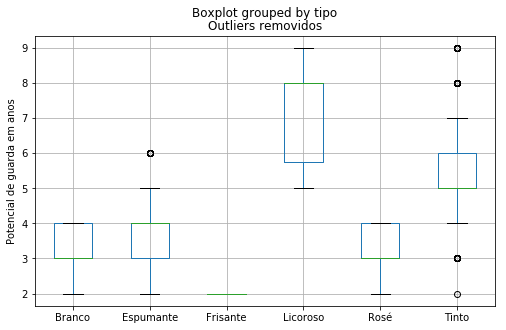

In [31]:
tipos_inside.boxplot(['potencial_de_guarda_anos'], by=['tipo'], figsize=(8,5))
plt.xlabel(None)
plt.ylabel('Potencial de guarda em anos')
plt.title('Outliers removidos')

In [32]:
tipos_outside.groupby('tipo')['potencial_de_guarda_anos'].describe()

,count,mean,std,min,25%,50%,75%,max
tipo,,,,,,,,
Branco,40.0,6.975000,2.358699,5.0,5.0,6.0,8.0,15.0
Espumante,17.0,13.294118,9.603155,7.0,9.0,10.0,10.0,44.0
Frisante,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
Licoroso,2.0,35.000000,21.213203,20.0,27.5,35.0,42.5,50.0
Tinto,93.0,15.290323,7.520379,10.0,10.0,12.0,20.0,50.0


### **Comparandos dataframes sem e com os outliers: procurando por insights**

In [33]:
tipos_inside[tipos_inside['tipo']=='Branco'].head(10)

,sku,tipo,uva,pais,regiao,vinicola,teor_alcoolico,amadurecimento,classificacao,visual,aroma,gosto,temperatura,potencial_de_guarda,potencial_de_guarda_anos
25,13314,Branco,Friulano (100%),Itália,Friuli,Fantinel,12.50% ABV,Mínimo de 6 anos em barricas de carvalho francês.,Seco,Amarelo brilhante.,"Frutas brancas frescas, nuance cítrica e veget...","Equilibrado, frutado, maduro e levemente mineral.",10 °C,4 anos,4
28,14014,Branco,"Viognier (65%), Marsanne (25%), Roussanne (10%)",França,Languedoc,Domaines Jean-Michel Cazes,13.00% ABV,Breve amadurecimento em barricas de carvalho.,Seco,Amarelo claro com tons verdeais.,"Flores, geleia de frutas brancas e manjericão.","Leve, com delicioso frescor, final sedoso e ha...",10 °C,4 anos,4
53,15833,Branco,"Viognier (65%), Marsanne (20%), Roussanne (15%)",França,Languedoc,Domaines Jean-Michel Cazes,13.00% ABV,Parte do vinho amadurece brevemente em barrica...,Seco,Amarelo claro.,Deliciosa mistura de frutas citricas com toque...,"Leve, com acidez refrescante, harmonioso e de ...",10 °C,4 anos,4
60,16363,Branco,Chardonnay (100%),Argentina,Mendoza,Finca Eugenio Bustos,13.50% ABV,Parte do vinho estagiou 6 meses em barricas de...,Seco,Amarelo claro.,"Frutas tropicais com destaque para abacaxi, co...","Frutado, fresco, com bom volume em boca.",10 °C,4 anos,4
74,17037,Branco,Chardonnay (100%),França,Bourgogne,Ropiteau Frères,12.50% ABV,Parte em aço inox e parte em barricas de carva...,Seco,Amarelo com reflexos esverdeados,"Cítrico, floral, ervas, hortelã, madressilva","Leve, boa acidez, mineral, boa persistência",10 °C,4 anos,4
75,17043,Branco,"Roupeiro, Arinto, Antão Vaz",Portugal,Alentejo,Esporão,13.50% ABV,Em tanques de aço inox.,Seco,Amarelo-palha com reflexos esverdeados.,"Frutas brancas maduras como pera, notas cítric...","Equilibrado, frutado, com boa presença em boca...",8 °C,3 anos,3
104,17534,Branco,"Antão Vaz (50%), Arinto (30%), Gouveio (20%)",Portugal,Alentejo,Herdade dos Grous,13.00% ABV,Em tanques de aço inox.,Seco,Amarelo-claro,"Frutas cítricas frescas, ervas","Médio corpo, boa acidez, lima, final persistente",10 °C,3 anos,3
124,17642,Branco,Torrontés,Argentina,La Rioja,Finca Eugenio Bustos,13.50% ABV,Em tanques de aço inox.,Seco,Amarelo-palha.,"Frutas frescas, frutas cítricas, rosas, flor d...","Equilibrado, leve, boa acidez.",9 °C,3 anos,3
134,18028,Branco,Sauvignon Blanc (100%),França,Graves,Château Langlet,13.50% ABV,6 meses em barricas de carvalho francês.,Seco,Amarelo-claro,"Maracujá, herbáceo","Corpo de leve para médio, boa acidez, frutado,...",10 °C,4 anos,4
137,18178,Branco,Viognier (100%),Uruguai,Canelones,Pueblo del Sol,13.50% ABV,Parte do vinho estagiou por 3 meses em barrica...,Seco,Amarelo-claro,"Frutas brancas, frutas amarelas, floral","Frutado, corpo de leve para médio, acidez agra...",8 °C,4 anos,4


In [34]:
tipos_outside[tipos_outside['tipo']=='Branco'].head(10)

,sku,tipo,uva,pais,regiao,vinicola,teor_alcoolico,amadurecimento,classificacao,visual,aroma,gosto,temperatura,potencial_de_guarda,potencial_de_guarda_anos
1,11549,Branco,Furmint (100%),Hungria,Tokaj,Pajzos,11.00% ABV,Sem passagem por carvalho.,Suave/Doce,Amarelo dourado,"Frutas brancas maduras, mel, figo seco, frutas...","Doce, equilibrado, acidez agradável, final longo",10 °C,15 anos,15
20,12946,Branco,Viognier (100%),França,Condrieu,Maison Bouachon,13.50% ABV,Parte do vinho amadurece por 4 meses em barric...,Seco,Amarelo claro com reflexos esverdeados.,"Frutas cítricas, damasco, mel, notas florais e...","Vivo, saboroso, mineral, frutado.",10 °C,6 anos,6
24,13313,Branco,Sauvignon Blanc (100%),Itália,Friuli,Fantinel,13.00% ABV,Em tanques de aço inox,Seco,Amarelo-palha com reflexos esverdeados,"Pimentão amarelo, abacaxi, banana, melão","Estruturado, frutado, vegetal, mineral, fresco...",10 °C,5 anos,5
26,13315,Branco,Ribolla Gialla (100%),Itália,Friuli,Fantinel,13.00% ABV,6 meses em tanques de aço inox.,Seco,Amarelo brilhante.,"Frutas maduras, com notas de nozes e ervas.","Boa presença em boca, predomínio de notas mine...",10 °C,5 anos,5
27,13639,Branco,Sauvignon Blanc (100%),Chile,Valle de Casablanca,Viña Canepa,13.00% ABV,5 meses em tanques de aço inox.,Seco,Amarelo palha com reflexos esverdeados.,Frutas cítricas com notas minerais.,"Frutado, fresco, com acidez equilibrada e um f...",9 °C,5 anos,5
35,14639,Branco,Moscato Bianco (100%),Itália,Piemonte,Beni di Batasiolo,12.00% ABV,Fermenta em barricas de carvalho francês por 8...,Suave/Doce,"Intenso amarelo com reflexos dourados, claro e...","Figos secos, mel, ameixas, damasco e pêssego e...","Persistente, doce, estruturado, intenso e com ...",8 °C,5 anos,5
40,14804,Branco,Moscato Bianco (100%),Itália,Sicilia,Planeta,12.50% ABV,23 meses em barricas de carvalho.,Suave/Doce,Amarelo claro com reflexos dourados.,"Damascos secos, pistache, laranja em calda, fl...","Doce, cremoso, acidez equilibrada e longo final.",8 °C,10 anos,10
98,17498,Branco,Chardonnay (100%),França,Bourgogne,Ropiteau Frères,13.00% ABV,"9 meses em barricas de carvalho, sobre as borr...",Seco,Amarelo,"Frutas brancas, frutas amarelas, baunilha, man...","Harmônico, corpo médio, frutado, tosta, baunil...",9 °C,8 anos,8
100,17501,Branco,Chardonnay (100.00%),França,Bourgogne,Ropiteau Frères,13.00% ABV,10 meses em tanques de aço inox.,Seco,Amarelo-claro,"Frutas brancas, herbáceo, mineral, floral","Elegante, delicado, corpo de leve para médio, ...",9 °C,5 anos,5
101,17511,Branco,Savagnin (100%),França,Arbois,Domaines Henri Maire,14.50% ABV,Mínimo de 6 anos em barricas de carvalho francês.,Seco,Amarelo dourado.,"Maçã assada, frutas cristalizadas, curry, açaf...","Frutas secas, nozes, curry, maçã verde, médio ...",15 °C,10 anos,10


* Os tipos de uva mais frequentes em cada grupo são diferentes
* Os vinhos com os menores potenciais de guarda (inside) geralmente são compostos por mais de uma uva
* Os vinhos com os maiores potenciais de guarda (outside) geralmente são compostos por apenas uma uva
* A distruição de países é ligeiramente diferente e pode influenciar no tipo de uva
* Teor alcoolico e classificação não mudem significativamente

In [35]:
ii = ficha_df['potencial_de_guarda_anos'] >= 10
ficha_df[ii].groupby('tipo')['potencial_de_guarda_anos'].describe()

,count,mean,std,min,25%,50%,75%,max
tipo,,,,,,,,
Branco,7.0,11.000000,1.914854,10.0,10.0,10.0,11.0,15.0
Espumante,10.0,16.900000,11.327940,10.0,10.0,10.0,22.5,44.0
Licoroso,2.0,35.000000,21.213203,20.0,27.5,35.0,42.5,50.0
Tinto,93.0,15.290323,7.520379,10.0,10.0,12.0,20.0,50.0


In [36]:
perc_tipo_out = 100*ficha_df[ii].groupby('tipo')['potencial_de_guarda_anos'].count()/ficha_df[ii].groupby('tipo')['potencial_de_guarda_anos'].count().sum()
perc_tipo_out.sort_values(inplace=True, ascending=False)
perc_tipo_out

tipo
Tinto        83.035714
Espumante     8.928571
Branco        6.250000
Licoroso      1.785714
Name: potencial_de_guarda_anos, dtype: float64

Text(0.5, 1.0, 'Vinhos com potencial de guarda >= 10 anos')

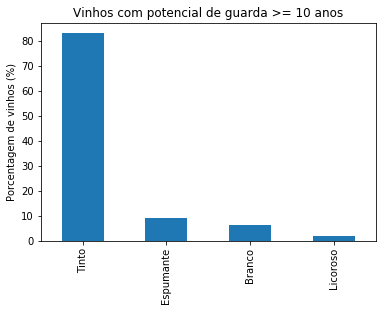

In [37]:
perc_tipo_out.plot.bar()
plt.xlabel(None)
plt.ylabel('Porcentagem de vinhos (%)')
plt.title('Vinhos com potencial de guarda >= 10 anos')

* 87% dos vinhos com os maiores potenciais de guarda são vinhos tintos
> Os vinhos tintos representam 63% do total

## **Tipos de uva**

In [38]:
ficha_df.groupby('uva')['potencial_de_guarda_anos'].describe()

,count,mean,std,min,25%,50%,75%,max
uva,,,,,,,,
Albaríño (100%),2.0,3.0,0.000000,3.0,3.0,3.0,3.0,3.0
"Alicante Bouschet (5%), Aragonez (40%), Trincadeira (40%), Syrah (15%)",2.0,5.0,0.000000,5.0,5.0,5.0,5.0,5.0
"Alicante Bouschet, Cabernet Sauvignon, Touriga Nacional",1.0,6.0,NaN,6.0,6.0,6.0,6.0,6.0
"Alicante Bouschet, Trincadeira , Aragonez",1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
Alvarinho (100%),1.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...
"Xarel-lo, Parellada, Macabeo",1.0,4.0,NaN,4.0,4.0,4.0,4.0,4.0
Zibibbo (100%),2.0,7.0,2.828427,5.0,6.0,7.0,8.0,9.0
Zinfandel (100.00%),1.0,10.0,NaN,10.0,10.0,10.0,10.0,10.0


* Não conseguimos usar os tipos de uvas diretamente como está no dataframe
* * Não há um padrão: alguns vinhos apresentam as proporções de cada uva e outros não

In [39]:
uva_df = pd.DataFrame(index=ficha_df.index)
uva_df['sku'] = ficha_df['sku']
uva_df['Uvas'] = pd.Series(np.zeros(len(uva_df['sku'])), index=uva_df)
uva_df['Numero de uvas'] = pd.Series(np.zeros(len(uva_df['sku'])), index=uva_df)

In [40]:
import re
for i in ficha_df.index:
    uvas = ficha_df['uva'][i]
    uva_list = (re.sub(r" ?\([^)]+\)", "", uvas))
    uva_df['Uvas'][i] = uva_list
    uva_df['Numero de uvas'][i] = uva_list.count(',') + 1

/home/anderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/anderson/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/anderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
uva_df.head()

,sku,Uvas,Numero de uvas
0,10839,"Chardonnay, Glera, Pinot Bianco",3.0
1,11549,Furmint,1.0
2,11610,"Chenin Blanc, Chardonnay",2.0
3,11982,Nero d'Avola,1.0
4,11983,"Catarratto, Grillo",2.0


### **Distribuição das uvas**

In [42]:
uva_list = []
for uvas in uva_df['Uvas']:
    for uva in uvas.split(','):
        uva_list.append(uva.strip(' '))
print('Tipos de uvas:', len(np.unique(uva_list)))
print()
print(np.unique(uva_list))

Tipos de uvas: 160

['Albaríño' 'Alicante Bouschet' 'Aligoté' 'Alvarinho' 'Ancellotta'
 'Antão Vaz' 'Aragonez' 'Aragonês' 'Arinto' 'Arneis' 'Baga' 'Barbera'
 'Bical' 'Bobal' 'Bonarda' 'Bourboulenc' 'Brachetto' 'Cabernet Franc'
 'Cabernet Gernisht' 'Cabernet Sauvignon' 'Canaiolo' 'Carignan' 'Cariñena'
 'Carménère' 'Castas tradicionais no Douro' 'Castelão' 'Catarratto'
 'Chardonnay' 'Chenin Blanc' 'Cinsault' 'Clairette' 'Colombard' 'Colorino'
 'Corvina' 'Corvina Veronese' 'Corvinone' 'Counoise' 'Criolla' 'Croatina'
 'Dolcetto' 'Dornfelder' 'Fernão Pires' 'Freisa' 'Friulano' 'Furmint'
 'Gamay' 'Garganega' 'Garnacha' 'Garnacha Blanca' 'Garnacha Tintorera'
 'Garnatxa' 'Gewürztraminer' 'Glera' 'Godello' 'Gouveio' 'Graciano'
 'Grechetto' 'Grenache' 'Grenache Blanc' 'Grenache Noir' 'Grillo' 'Jampal'
 'Lambrusco' 'Loureiro' 'Macabeo' 'Malbec' 'Malvasia' 'Malvasia Bianca'
 'Malvasia Fina' 'Malvasia Nera' 'Malvasia de Cândia' 'Marsanne'
 'Marselan' 'Mataro' 'Mencía' 'Merlot' 'Monastrell' 'Moscate

In [43]:
from nltk import FreqDist
freq_uvas = FreqDist(uva_list)

freq_dist = pd.DataFrame({
    'Uvas': list(freq_uvas.keys()), 'Contagem': list(freq_uvas.values())})
most_freq = freq_dist.nlargest(columns='Contagem', n=10)
most_freq['Percentual'] = 100*most_freq['Contagem']/len(ficha_df)
most_freq

,Uvas,Contagem,Percentual
13,Cabernet Sauvignon,194,22.743259
12,Merlot,141,16.529894
0,Chardonnay,136,15.943728
9,Pinot Noir,107,12.543962
27,Syrah,103,12.075029
14,Cabernet Franc,70,8.206331
17,Malbec,48,5.627198
19,Sauvignon Blanc,45,5.275498
36,Tempranillo,35,4.103165
50,Carménère,35,4.103165


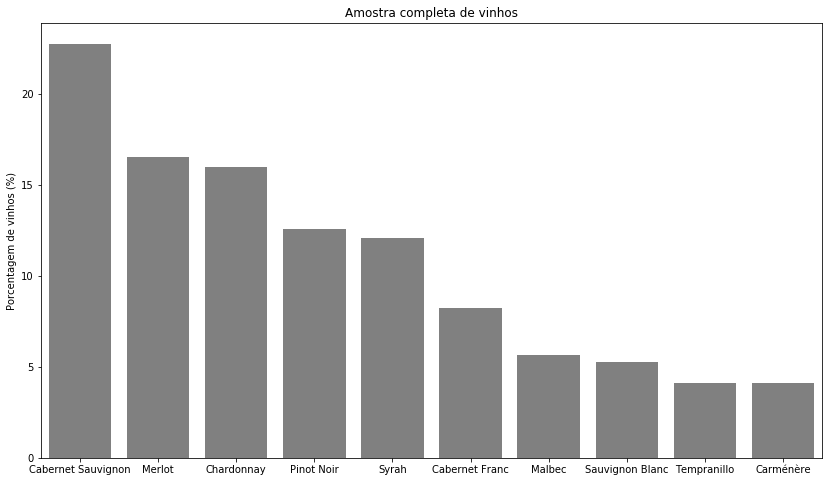

In [44]:
import seaborn as sns
plt.figure(figsize=(14,8))
ax = sns.barplot(data=most_freq,
                 x='Uvas', y='Percentual', color='gray')
ax.set(xlabel=None)
ax.set(ylabel='Porcentagem de vinhos (%)')
ax.set(title = 'Amostra completa de vinhos')
plt.show()

### **Bag of words**

* Precisamos converter o texto (conjunto de strings) em números. Como?
* Criando um vocabulário geral que represente bem todo a amostra
* Contar quantas vezes cada palavra do vocabulário aparece naquele texto e construir um vetor de contagem
* Modelar a relação entre os vetores de contagem com a target: potencial de guarda 

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
max_features = 20
vectorizer = CountVectorizer(lowercase=False, ngram_range=(1,1), max_features=max_features)
bag_sparse = vectorizer.fit_transform(uva_df['Uvas'])
bag_of_words = pd.DataFrame.sparse.from_spmatrix(bag_sparse, columns=vectorizer.get_feature_names())
print(bag_of_words.keys())

Index(['Blanc', 'Cabernet', 'Carménère', 'Chardonnay', 'Franc', 'Garnacha',
       'Grenache', 'Malbec', 'Merlot', 'Meunier', 'Nacional', 'Noir', 'Petit',
       'Pinot', 'Sangiovese', 'Sauvignon', 'Syrah', 'Tempranillo', 'Touriga',
       'Verdot'],
      dtype='object')


* **Quanto as 20 uvas mais frequentes representam da amostra total?**

In [47]:
in_top = 0
for i in bag_of_words.index:
    if np.array(bag_of_words.iloc[i]).sum() > 0: in_top += 1
in_top/len(bag_of_words)

0.8007033997655334

* Para se obter 90% da amostra total, precisamos das 50 uvas mais frequentes

In [48]:
uva_df = pd.concat([uva_df, bag_of_words], axis=1)
uva_df['potencial_de_guarda_anos'] = ficha_df['potencial_de_guarda_anos']

In [49]:
uva_df

,sku,Uvas,Numero de uvas,Blanc,Cabernet,Carménère,Chardonnay,Franc,Garnacha,Grenache,...,Noir,Petit,Pinot,Sangiovese,Sauvignon,Syrah,Tempranillo,Touriga,Verdot,potencial_de_guarda_anos
0,10839,"Chardonnay, Glera, Pinot Bianco",3.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,4
1,11549,Furmint,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,11610,"Chenin Blanc, Chardonnay",2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,11982,Nero d'Avola,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,11983,"Catarratto, Grillo",2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,SHG258,Merlot,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
849,SKL111,"Alicante Bouschet, Aragonez, Trincadeira , Syrah",4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
850,VSV261,Cabernet Sauvignon,1.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5
851,XPI466,Pinot Noir,1.0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,6


### **Análise do número de uvas**

Text(0.5, 1.0, '')

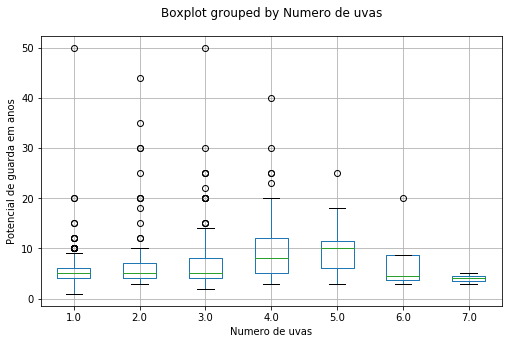

In [50]:
uva_df.boxplot(['potencial_de_guarda_anos'], by=['Numero de uvas'], figsize=(8,5))
plt.xlabel('Numero de uvas')
plt.ylabel('Potencial de guarda em anos')
plt.title('')

* O potencial de guarda máximo diminui conforme o aumento do número de uvas
> há uma queda abrupta a partir de quatro uvas

In [51]:
ii = (uva_df['Cabernet'] == 0) | (uva_df['Sauvignon'] == 0)
uva_df['potencial_de_guarda_anos'][ii].describe()

count    658.000000
mean       5.749240
std        4.213052
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max       50.000000
Name: potencial_de_guarda_anos, dtype: float64

In [52]:
ii = (uva_df['Cabernet'] == 1) & (uva_df['Sauvignon'] == 1)
uva_df['potencial_de_guarda_anos'][ii].describe()

count    149.000000
mean       6.664430
std        5.178713
min        2.000000
25%        5.000000
50%        5.000000
75%        7.000000
max       50.000000
Name: potencial_de_guarda_anos, dtype: float64

* A presenção da Cabernet Sauvignon aumenta ligeiramente o potencial de guarda dos vinhos

In [53]:
ii = uva_df['Merlot'] == 0
uva_df['potencial_de_guarda_anos'][ii].describe()

count    712.000000
mean       5.608146
std        3.723131
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max       50.000000
Name: potencial_de_guarda_anos, dtype: float64

In [54]:
ii = uva_df['Merlot'] == 1
uva_df['potencial_de_guarda_anos'][ii].describe()

count    141.000000
mean       9.978723
std        7.827121
min        2.000000
25%        5.000000
50%        7.000000
75%       12.000000
max       50.000000
Name: potencial_de_guarda_anos, dtype: float64

* A presenção da uva Merlot também aumenta ligeiramente o potencial de guarda dos vinhos

In [55]:
ii = uva_df['Chardonnay'] == 0
uva_df['potencial_de_guarda_anos'][ii].describe()

count    718.000000
mean       6.498607
std        4.952423
min        1.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       50.000000
Name: potencial_de_guarda_anos, dtype: float64

In [56]:
ii = uva_df['Chardonnay'] == 1
uva_df['potencial_de_guarda_anos'][ii].describe()

count    134.000000
mean       5.440299
std        4.723181
min        2.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       44.000000
Name: potencial_de_guarda_anos, dtype: float64

In [57]:
ii = uva_df['Malbec'] == 0
uva_df['potencial_de_guarda_anos'][ii].describe()

count    805.000000
mean       6.238509
std        4.930891
min        1.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       50.000000
Name: potencial_de_guarda_anos, dtype: float64

In [58]:
ii = uva_df['Malbec'] == 1
uva_df['potencial_de_guarda_anos'][ii].describe()

count    48.00000
mean      7.87500
std       4.63853
min       3.00000
25%       5.00000
50%       6.00000
75%      10.00000
max      25.00000
Name: potencial_de_guarda_anos, dtype: float64

* A presença da uva Malbec reduz o potencial de guarda máximo de 50 para 25 anos

In [59]:
ii = ficha_df['potencial_de_guarda_anos'] >= 10

uva_list = []
for uvas in uva_df['Uvas'][ii]:
    for uva in uvas.split(','):
        uva_list.append(uva.strip(' '))

freq_uvas = FreqDist(uva_list)

freq_dist = pd.DataFrame({
    'Uvas': list(freq_uvas.keys()), 'Contagem': list(freq_uvas.values())})
most_freq = freq_dist.nlargest(columns='Contagem', n=10)
most_freq['Percentual'] = 100*most_freq['Contagem']/len(ficha_df[ii])
most_freq

,Uvas,Contagem,Percentual
2,Cabernet Sauvignon,53,47.321429
1,Merlot,51,45.535714
3,Cabernet Franc,41,36.607143
4,Petit Verdot,21,18.750000
12,Syrah,16,14.285714
14,Malbec,13,11.607143
9,Chardonnay,12,10.714286
10,Pinot Noir,10,8.928571
8,Carménère,7,6.250000
38,Touriga Nacional,4,3.571429


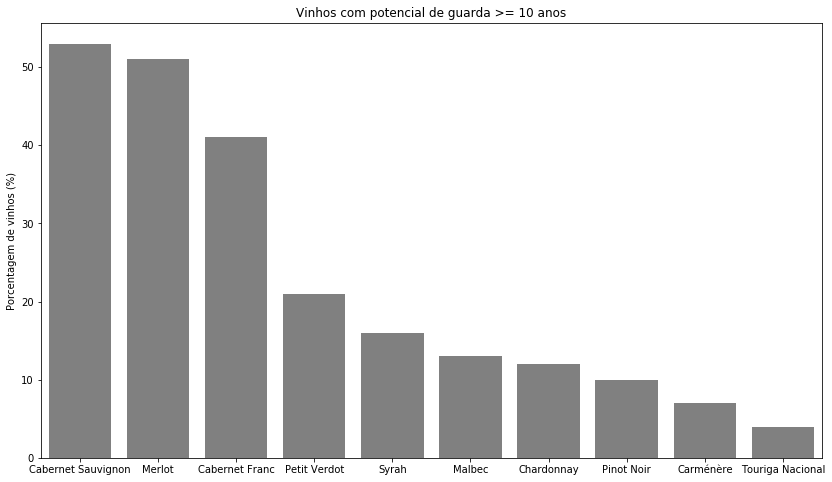

In [60]:
plt.figure(figsize=(14,8))
ax = sns.barplot(data=most_freq,
                 x='Uvas', y='Contagem', color='gray')
ax.set(xlabel=None)
ax.set(ylabel='Porcentagem de vinhos (%)')
ax.set(title='Vinhos com potencial de guarda >= 10 anos')
plt.show()

## **Vinhos por país**

In [61]:
pais = ficha_df.groupby('pais')['potencial_de_guarda_anos']
pais.describe()

,count,mean,std,min,25%,50%,75%,max
pais,,,,,,,,
Alemanha,4.0,4.500000,1.290994,3.0,3.75,4.5,5.25,6.0
Argentina,85.0,5.282353,2.510036,2.0,4.00,5.0,6.00,20.0
Austrália,14.0,4.285714,0.994490,3.0,3.25,4.5,5.00,6.0
Brasil,27.0,4.370370,1.735337,2.0,3.00,4.0,5.00,9.0
Chile,139.0,5.273381,2.691387,2.0,3.00,5.0,6.00,18.0
China,5.0,4.200000,1.095445,3.0,4.00,4.0,4.00,6.0
Espanha,100.0,5.320000,1.847083,3.0,4.00,5.0,6.25,10.0
Estados Unidos,44.0,6.750000,4.115343,3.0,4.75,6.0,6.25,25.0
França,212.0,8.882075,7.601463,2.0,5.00,6.0,10.00,50.0


In [62]:
pais_count = pais.count()
pais_count.sort_values(ascending=False, inplace=True)
pais_count = 100*pais_count/pais_count.sum()

Text(0.5, 1.0, 'Amostra completa de vinhos')

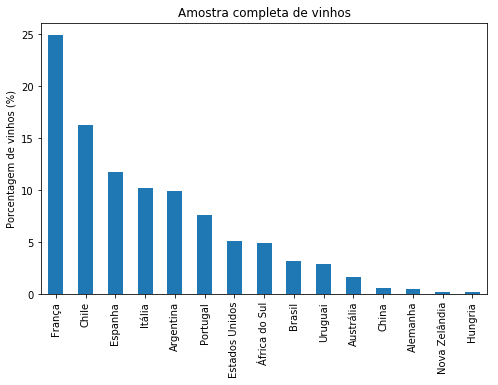

In [63]:
plt.figure(figsize=(8,5))
pais_count.plot.bar()
plt.xlabel(None)
plt.ylabel('Porcentagem de vinhos (%)')
plt.title('Amostra completa de vinhos')

Text(0.5, 1.0, '')

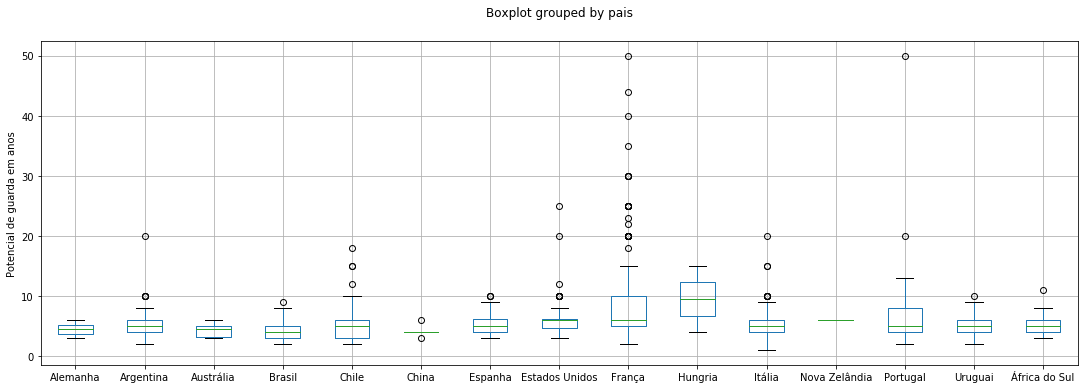

In [64]:
ficha_df.boxplot(['potencial_de_guarda_anos'], by=['pais'], figsize=(18,6), fontsize=10)
plt.xlabel(None)
plt.ylabel('Potencial de guarda em anos')
plt.title('')

* Os vinhos com os maiores potencial de guarda são os franceses

In [65]:
ii = ficha_df['potencial_de_guarda_anos'] >= 10
pais_out = ficha_df[ii].groupby('pais')['potencial_de_guarda_anos']
pais_out.describe()

,count,mean,std,min,25%,50%,75%,max
pais,,,,,,,,
Argentina,5.0,12.000000,4.472136,10.0,10.0,10.0,10.0,20.0
Chile,14.0,11.428571,2.622808,10.0,10.0,10.0,11.5,18.0
Espanha,3.0,10.000000,0.000000,10.0,10.0,10.0,10.0,10.0
Estados Unidos,9.0,13.000000,5.567764,10.0,10.0,10.0,12.0,25.0
França,59.0,18.000000,9.227022,10.0,10.0,15.0,22.5,50.0
Hungria,1.0,15.000000,NaN,15.0,15.0,15.0,15.0,15.0
Itália,8.0,12.500000,3.779645,10.0,10.0,10.0,15.0,20.0
Portugal,11.0,15.727273,11.696930,10.0,11.0,12.0,12.5,50.0
Uruguai,1.0,10.000000,NaN,10.0,10.0,10.0,10.0,10.0


In [66]:
pais_count = pais_out.count()
pais_count.sort_values(ascending=False, inplace=True)
pais_count = 100*pais_count/pais_count.sum()

Text(0.5, 1.0, 'Vinhos com potencial de guarda >= 10 anos')

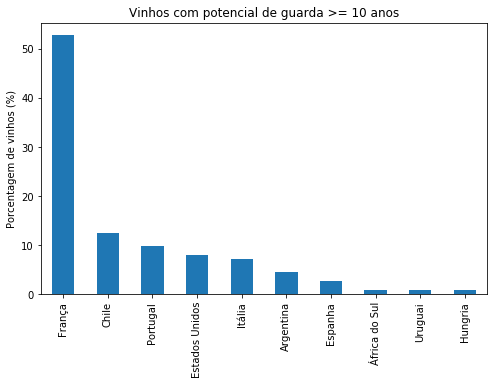

In [67]:
plt.figure(figsize=(8,5))
pais_count.plot.bar()
plt.xlabel(None)
plt.ylabel('Porcentagem de vinhos (%)')
plt.title('Vinhos com potencial de guarda >= 10 anos')

* 66% dos vinhos com os maiores potenciais de guarda são franceses
> os vinhos franceses representa apenas 25% da amostra total

### **Variabilidade por região no mesmo país**

In [68]:
ii = ficha_df['pais'] == 'França'
ficha_df[ii].groupby('regiao')['potencial_de_guarda_anos'].describe()

,count,mean,std,min,25%,50%,75%,max
regiao,,,,,,,,
Arbois,4.0,6.250000,2.872281,3.0,5.25,6.0,7.00,10.0
Beaujolais,3.0,4.000000,1.732051,2.0,3.50,5.0,5.00,5.0
Bergerac,2.0,5.000000,0.000000,5.0,5.00,5.0,5.00,5.0
Bordeaux,13.0,4.846154,1.993579,2.0,4.00,5.0,6.00,8.0
Bourgogne,15.0,5.266667,2.576450,2.0,3.00,5.0,7.00,10.0
Brouilly,2.0,8.000000,2.828427,6.0,7.00,8.0,9.00,10.0
Cahors,1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0
Cairanne,1.0,7.000000,NaN,7.0,7.00,7.0,7.00,7.0
Castillon Côtes de Bordeaux,1.0,9.000000,NaN,9.0,9.00,9.0,9.00,9.0


In [69]:
ii = ficha_df['regiao'] == 'Champagne'
ficha_df[ii].groupby('tipo')['potencial_de_guarda_anos'].describe()

,count,mean,std,min,25%,50%,75%,max
tipo,,,,,,,,
Espumante,39.0,8.230769,7.696416,3.0,4.0,6.0,9.5,44.0


In [70]:
ii = (ficha_df['regiao'] == 'Champagne') & (ficha_df['potencial_de_guarda_anos'] >= 10)

uva_list = []
for uvas in uva_df['Uvas'][ii]:
    for uva in uvas.split(','):
        uva_list.append(uva.strip(' '))

freq_uvas = FreqDist(uva_list)

freq_dist = pd.DataFrame({
    'Uvas': list(freq_uvas.keys()), 'Contagem': list(freq_uvas.values())})
most_freq = freq_dist.nlargest(columns='Contagem', n=10)
most_freq['Percentual'] = 100*most_freq['Contagem']/len(ficha_df[ii])
most_freq

,Uvas,Contagem,Percentual
0,Chardonnay,10,100.0
1,Pinot Noir,8,80.0
2,Pinot Meunier,4,40.0


In [71]:
ii = ficha_df['regiao'] == 'Margaux'
ficha_df[ii].groupby('tipo')['potencial_de_guarda_anos'].describe()

,count,mean,std,min,25%,50%,75%,max
tipo,,,,,,,,
Tinto,5.0,27.6,13.649176,15.0,20.0,23.0,30.0,50.0


In [72]:
ii = (ficha_df['regiao'] == 'Margaux') & (ficha_df['potencial_de_guarda_anos'] >= 10)

uva_list = []
for uvas in uva_df['Uvas'][ii]:
    for uva in uvas.split(','):
        uva_list.append(uva.strip(' '))

freq_uvas = FreqDist(uva_list)

freq_dist = pd.DataFrame({
    'Uvas': list(freq_uvas.keys()), 'Contagem': list(freq_uvas.values())})
most_freq = freq_dist.nlargest(columns='Contagem', n=10)
most_freq['Percentual'] = 100*most_freq['Contagem']/len(ficha_df[ii])
most_freq

,Uvas,Contagem,Percentual
0,Cabernet Sauvignon,5,100.0
1,Merlot,5,100.0
2,Petit Verdot,4,80.0
3,Cabernet Franc,2,40.0


* As regiões de Champagne, Châteauneuf-du-Pape e Margaux na França produzem os vinhos com os maiores potenciais de guarda (acima de 10 anos)

In [73]:
ii = ficha_df['pais'] == 'Portugal'
ficha_df[ii].groupby('regiao')['potencial_de_guarda_anos'].describe()

,count,mean,std,min,25%,50%,75%,max
regiao,,,,,,,,
Alentejo,17.0,4.823529,2.038237,3.0,3.00,5.0,5.00,10.0
Bairrada,3.0,3.333333,0.577350,3.0,3.00,3.0,3.50,4.0
Beira Atlântico,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0
Beira Interior,2.0,5.500000,2.121320,4.0,4.75,5.5,6.25,7.0
Douro,14.0,10.000000,12.322587,2.0,4.00,6.5,8.00,50.0
Dão,1.0,5.000000,NaN,5.0,5.00,5.0,5.00,5.0
Lisboa,10.0,5.300000,2.311805,3.0,4.00,4.5,5.00,10.0
Minho,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0
Península de Setúbal,3.0,4.333333,1.154701,3.0,4.00,5.0,5.00,5.0


In [74]:
ii = (ficha_df['regiao'] == 'Douro') & (ficha_df['potencial_de_guarda_anos'] >= 10)
ficha_df[ii].groupby('tipo')['potencial_de_guarda_anos'].describe()

,count,mean,std,min,25%,50%,75%,max
tipo,,,,,,,,
Licoroso,2.0,35.0,21.213203,20.0,27.5,35.0,42.5,50.0
Tinto,1.0,10.0,NaN,10.0,10.0,10.0,10.0,10.0


In [75]:
ii = (ficha_df['regiao'] == 'Douro') & (ficha_df['potencial_de_guarda_anos'] >= 10)

uva_list = []
for uvas in uva_df['Uvas'][ii]:
    for uva in uvas.split(','):
        uva_list.append(uva.strip(' '))

freq_uvas = FreqDist(uva_list)

freq_dist = pd.DataFrame({
    'Uvas': list(freq_uvas.keys()), 'Contagem': list(freq_uvas.values())})
most_freq = freq_dist.nlargest(columns='Contagem', n=10)
most_freq['Percentual'] = 100*most_freq['Contagem']/len(ficha_df[ii])
most_freq

,Uvas,Contagem,Percentual
0,Castas tradicionais no Douro,3,100.0


* Os vinhos da região de Douro (Porto) em Portugal produz vinhos com altos potenciais de guarda

* Há muitas regiões com baixa contagem de amostra
> sem significância estatística

## **Produção de uvas por país**

In [76]:
def mostfreq_uvas(uva_df, ii):

    uva_list = []
    for uvas in uva_df['Uvas'][ii]:
        for uva in uvas.split(','):
            uva_list.append(uva.strip(' '))

    freq_uvas = FreqDist(uva_list)

    freq_dist = pd.DataFrame({
        'Uvas': list(freq_uvas.keys()), 'Contagem': list(freq_uvas.values())})
    most_freq = freq_dist.nlargest(columns='Contagem', n=10)
    most_freq['Percentual'] = 100*most_freq['Contagem']/len(ficha_df[ii])
    return most_freq

In [77]:
ii = ficha_df['pais'] == 'França'
mostfreq_uvas(uva_df, ii)

,Uvas,Contagem,Percentual
3,Merlot,74,34.905660
11,Chardonnay,59,27.830189
0,Pinot Noir,57,26.886792
4,Cabernet Sauvignon,54,25.471698
5,Cabernet Franc,50,23.584906
14,Pinot Meunier,27,12.735849
12,Syrah,23,10.849057
2,Grenache,20,9.433962
1,Gamay,15,7.075472
6,Petit Verdot,13,6.132075


In [78]:
ii = ficha_df['pais'] == 'Brasil'
mostfreq_uvas(uva_df, ii)

,Uvas,Contagem,Percentual
5,Chardonnay,20,74.074074
3,Pinot Noir,19,70.370370
4,Riesling Itálico,10,37.037037
9,Riesling,3,11.111111
7,Merlot,2,7.407407
8,Tannat,2,7.407407
10,Prosecco,2,7.407407
0,Malvasia de Cândia,1,3.703704
1,Malvasia Bianca,1,3.703704
2,Moscatel Graúdo,1,3.703704


In [79]:
ii = (uva_df['Cabernet'] == 1) & (uva_df['Sauvignon'] == 1)
ficha_df[ii].groupby(['pais', 'tipo'])['potencial_de_guarda_anos'].describe()

count       mean        std  min   25%  50%    75%  \
pais           tipo                                                         
Argentina      Tinto    16.0   5.562500   1.750000  4.0  4.00  5.0   6.25   
Austrália      Tinto     4.0   4.750000   0.500000  4.0  4.75  5.0   5.00   
Brasil         Tinto     1.0   7.000000        NaN  7.0  7.00  7.0   7.00   
Chile          Rosé      3.0   3.000000   0.000000  3.0  3.00  3.0   3.00   
               Tinto    42.0   5.904762   2.564386  3.0  4.00  5.0   7.00   
China          Branco    1.0   4.000000        NaN  4.0  4.00  4.0   4.00   
               Tinto     1.0   4.000000        NaN  4.0  4.00  4.0   4.00   
Espanha        Tinto     7.0   5.428571   1.133893  5.0  5.00  5.0   5.00   
Estados Unidos Tinto    14.0   7.000000   2.353394  5.0  5.00  6.0  10.00   
França         Rosé      1.0   2.000000        NaN  2.0  2.00  2.0   2.00   
               Tinto    25.0  11.200000  10.673175  5.0  5.00  6.0  12.00   
Itália         Tinto     9.0   5.666667   1.732051  4.0  5.00  5.0   6.00   
Portugal       Tinto     7.0   7.000000   2.581989  4.0  5.00  6.0   9.50   
Uruguai        Tinto     5.0   5.200000   1.643168  4.0  4.00  5.0   5.00   
África do Sul  Tinto    13.0   5.307692   2.213015  3.0  4.00  4.0   6.00   

                        max  
pais           tipo          
Argentina      Tinto   10.0  
Austrália      Tinto    5.0  
Brasil         Tinto    7.0  
Chile          Rosé     3.0  
               Tinto   15.0  
China          Branco   4.0  
               Tinto    4.0  
Espanha        Tinto    8.0  
Estados Unidos Tinto   10.0  
França         Rosé     2.0  
               Tinto   50.0  
Itália         Tinto    9.0  
Portugal       Tinto   10.0  
Uruguai        Tinto    8.0  
África do Sul  Tinto   11.0

In [80]:
ii = uva_df['Merlot'] == 1
ficha_df[ii].groupby(['pais', 'tipo'])['potencial_de_guarda_anos'].describe()

count       mean       std  min   25%   50%    75%  \
pais           tipo                                                            
Argentina      Tinto        3.0   6.000000  3.464102  4.0  4.00   4.0   7.00   
Austrália      Tinto        1.0   5.000000       NaN  5.0  5.00   5.0   5.00   
Brasil         Tinto        2.0   7.500000  0.707107  7.0  7.25   7.5   7.75   
Chile          Rosé         1.0   3.000000       NaN  3.0  3.00   3.0   3.00   
               Tinto       19.0   7.210526  4.441958  3.0  3.00   7.0  10.00   
Espanha        Tinto        9.0   5.555556  1.509231  3.0  5.00   5.0   7.00   
Estados Unidos Tinto        9.0   7.777778  6.476453  5.0  5.00   6.0   6.00   
França         Espumante    3.0   3.333333  0.577350  3.0  3.00   3.0   3.50   
               Rosé         2.0   3.000000  1.414214  2.0  2.50   3.0   3.50   
               Tinto       69.0  13.855072  9.070436  4.0  7.00  10.0  20.00   
Itália         Tinto       11.0   6.545455  2.067058  4.0  5.00   6.0   8.50   
Uruguai        Tinto        3.0   5.666667  2.081666  4.0  4.50   5.0   6.50   
África do Sul  Tinto        9.0   5.333333  2.500000  3.0  4.00   5.0   6.00   

                           max  
pais           tipo             
Argentina      Tinto      10.0  
Austrália      Tinto       5.0  
Brasil         Tinto       8.0  
Chile          Rosé        3.0  
               Tinto      18.0  
Espanha        Tinto       8.0  
Estados Unidos Tinto      25.0  
França         Espumante   4.0  
               Rosé        4.0  
               Tinto      50.0  
Itália         Tinto      10.0  
Uruguai        Tinto       8.0  
África do Sul  Tinto      11.0

In [81]:
ii = uva_df['Chardonnay'] == 1
ficha_df[ii].groupby(['pais', 'tipo'])['potencial_de_guarda_anos'].describe()

count      mean       std  min   25%  50%   75%  \
pais           tipo                                                         
Argentina      Branco      12.0  3.666667  1.230915  2.0  3.00  3.0  4.00   
               Espumante    4.0  3.000000  0.000000  3.0  3.00  3.0  3.00   
Austrália      Branco       1.0  4.000000       NaN  4.0  4.00  4.0  4.00   
Brasil         Espumante   20.0  4.350000  1.631112  2.0  3.00  4.0  5.00   
Chile          Branco      12.0  4.583333  1.781640  3.0  3.75  4.0  5.00   
               Espumante    4.0  3.250000  0.500000  3.0  3.00  3.0  3.25   
Espanha        Branco       3.0  3.333333  0.577350  3.0  3.00  3.0  3.50   
Estados Unidos Branco       8.0  4.250000  0.462910  4.0  4.00  4.0  4.25   
França         Branco      15.0  6.266667  2.520393  3.0  4.00  5.0  8.00   
               Espumante   42.0  7.809524  7.558675  2.0  4.00  6.0  9.00   
Itália         Branco       3.0  3.666667  0.577350  3.0  3.50  4.0  4.00   
               Espumante    4.0  3.750000  0.500000  3.0  3.75  4.0  4.00   
Portugal       Branco       2.0  3.500000  0.707107  3.0  3.25  3.5  3.75   
Uruguai        Branco       3.0  3.333333  0.577350  3.0  3.00  3.0  3.50   
África do Sul  Espumante    1.0  5.000000       NaN  5.0  5.00  5.0  5.00   

                           max  
pais           tipo             
Argentina      Branco      6.0  
               Espumante   3.0  
Austrália      Branco      4.0  
Brasil         Espumante   9.0  
Chile          Branco      9.0  
               Espumante   4.0  
Espanha        Branco      4.0  
Estados Unidos Branco      5.0  
França         Branco     10.0  
               Espumante  44.0  
Itália         Branco      4.0  
               Espumante   4.0  
Portugal       Branco      4.0  
Uruguai        Branco      4.0  
África do Sul  Espumante   5.0

## **Produção de uvas por tipo de vinho**

In [82]:
for tipo in ficha_df['tipo'].unique():
    ii = ficha_df['tipo'] == tipo
    print(tipo)
    print(mostfreq_uvas(uva_df, ii))
    print()

Espumante
                Uvas  Contagem  Percentual
0         Chardonnay        77   72.641509
5         Pinot Noir        73   68.867925
13     Pinot Meunier        27   25.471698
15  Riesling Itálico        10    9.433962
6              Gamay         8    7.547170
1              Glera         7    6.603774
18           Macabeo         6    5.660377
16          Xarel-lo         5    4.716981
17         Parellada         5    4.716981
7           Grenache         4    3.773585

Branco
               Uvas  Contagem  Percentual
8        Chardonnay        59   33.522727
2   Sauvignon Blanc        43   24.431818
1          Viognier        13    7.386364
10           Arinto        10    5.681818
21          Verdejo         9    5.113636
14        Torrontés         7    3.977273
11        Antão Vaz         6    3.409091
23     Pinot Grigio         6    3.409091
18     Chenin Blanc         5    2.840909
6         Roussanne         4    2.272727

Licoroso
                           Uvas  Cont

* As uvas parecem estar bem agrupadas por tipo de vinho
> Cada tipo tem uma seleção bem particular de uvas

In [83]:
ii = (ficha_df['tipo'] == 'Tinto') & (ficha_df['pais'] == 'França')
mostfreq_uvas(uva_df, ii)

,Uvas,Contagem,Percentual
0,Merlot,69,55.2
1,Cabernet Sauvignon,53,42.4
2,Cabernet Franc,47,37.6
4,Syrah,22,17.6
3,Petit Verdot,13,10.4
6,Grenache,13,10.4
9,Pinot Noir,12,9.6
5,Mourvèdre,10,8.0
7,Carignan,10,8.0
10,Malbec,8,6.4


In [84]:
ii = (ficha_df['tipo'] == 'Tinto') & (ficha_df['pais'] == 'Portugal')
mostfreq_uvas(uva_df, ii)

,Uvas,Contagem,Percentual
1,Touriga Nacional,24,66.666667
0,Touriga Franca,13,36.111111
2,Tinta Roriz,13,36.111111
4,Syrah,12,33.333333
7,Alicante Bouschet,11,30.555556
3,Aragonez,9,25.000000
6,Trincadeira,7,19.444444
10,Cabernet Sauvignon,7,19.444444
9,Castelão,5,13.888889
5,Sousão,3,8.333333


* Entretanto, o mesmo tipo de vinho usa uvas diferentes conforme o país de cultivo

## **Agrupamento por tipo de uva**

In [85]:
max_features = 50
vectorizer = CountVectorizer(lowercase=False, ngram_range=(1,1), max_features=max_features)
bag_sparse = vectorizer.fit_transform(uva_df['Uvas'])
bag_of_words = pd.DataFrame.sparse.from_spmatrix(bag_sparse, columns=vectorizer.get_feature_names())

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bag_rescaled = scaler.fit_transform(bag_of_words)

/home/anderson/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype Sparse[int64, 0] were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/anderson/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype Sparse[int64, 0] were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [87]:
from sklearn.cluster import KMeans
n_clusters = 6
model = KMeans(n_clusters=n_clusters)
model.fit(bag_rescaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [88]:
uva_cluster = bag_of_words.copy()
uva_cluster['Cluster'] = model.labels_
uva_cluster

,Alicante,Aragonez,Arinto,Blanc,Bouschet,Cabernet,Carignan,Carménère,Chardonnay,Chenin,...,Torrontés,Touriga,Trincadeira,Verdejo,Verdot,Viognier,Zinfandel,autorizadas,uvas,Cluster
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
849,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
850,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
centers = pd.DataFrame(model.cluster_centers_, columns=bag_of_words.columns)
centers = centers.transpose()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f823d5c8eb8>,
      dtype=object)

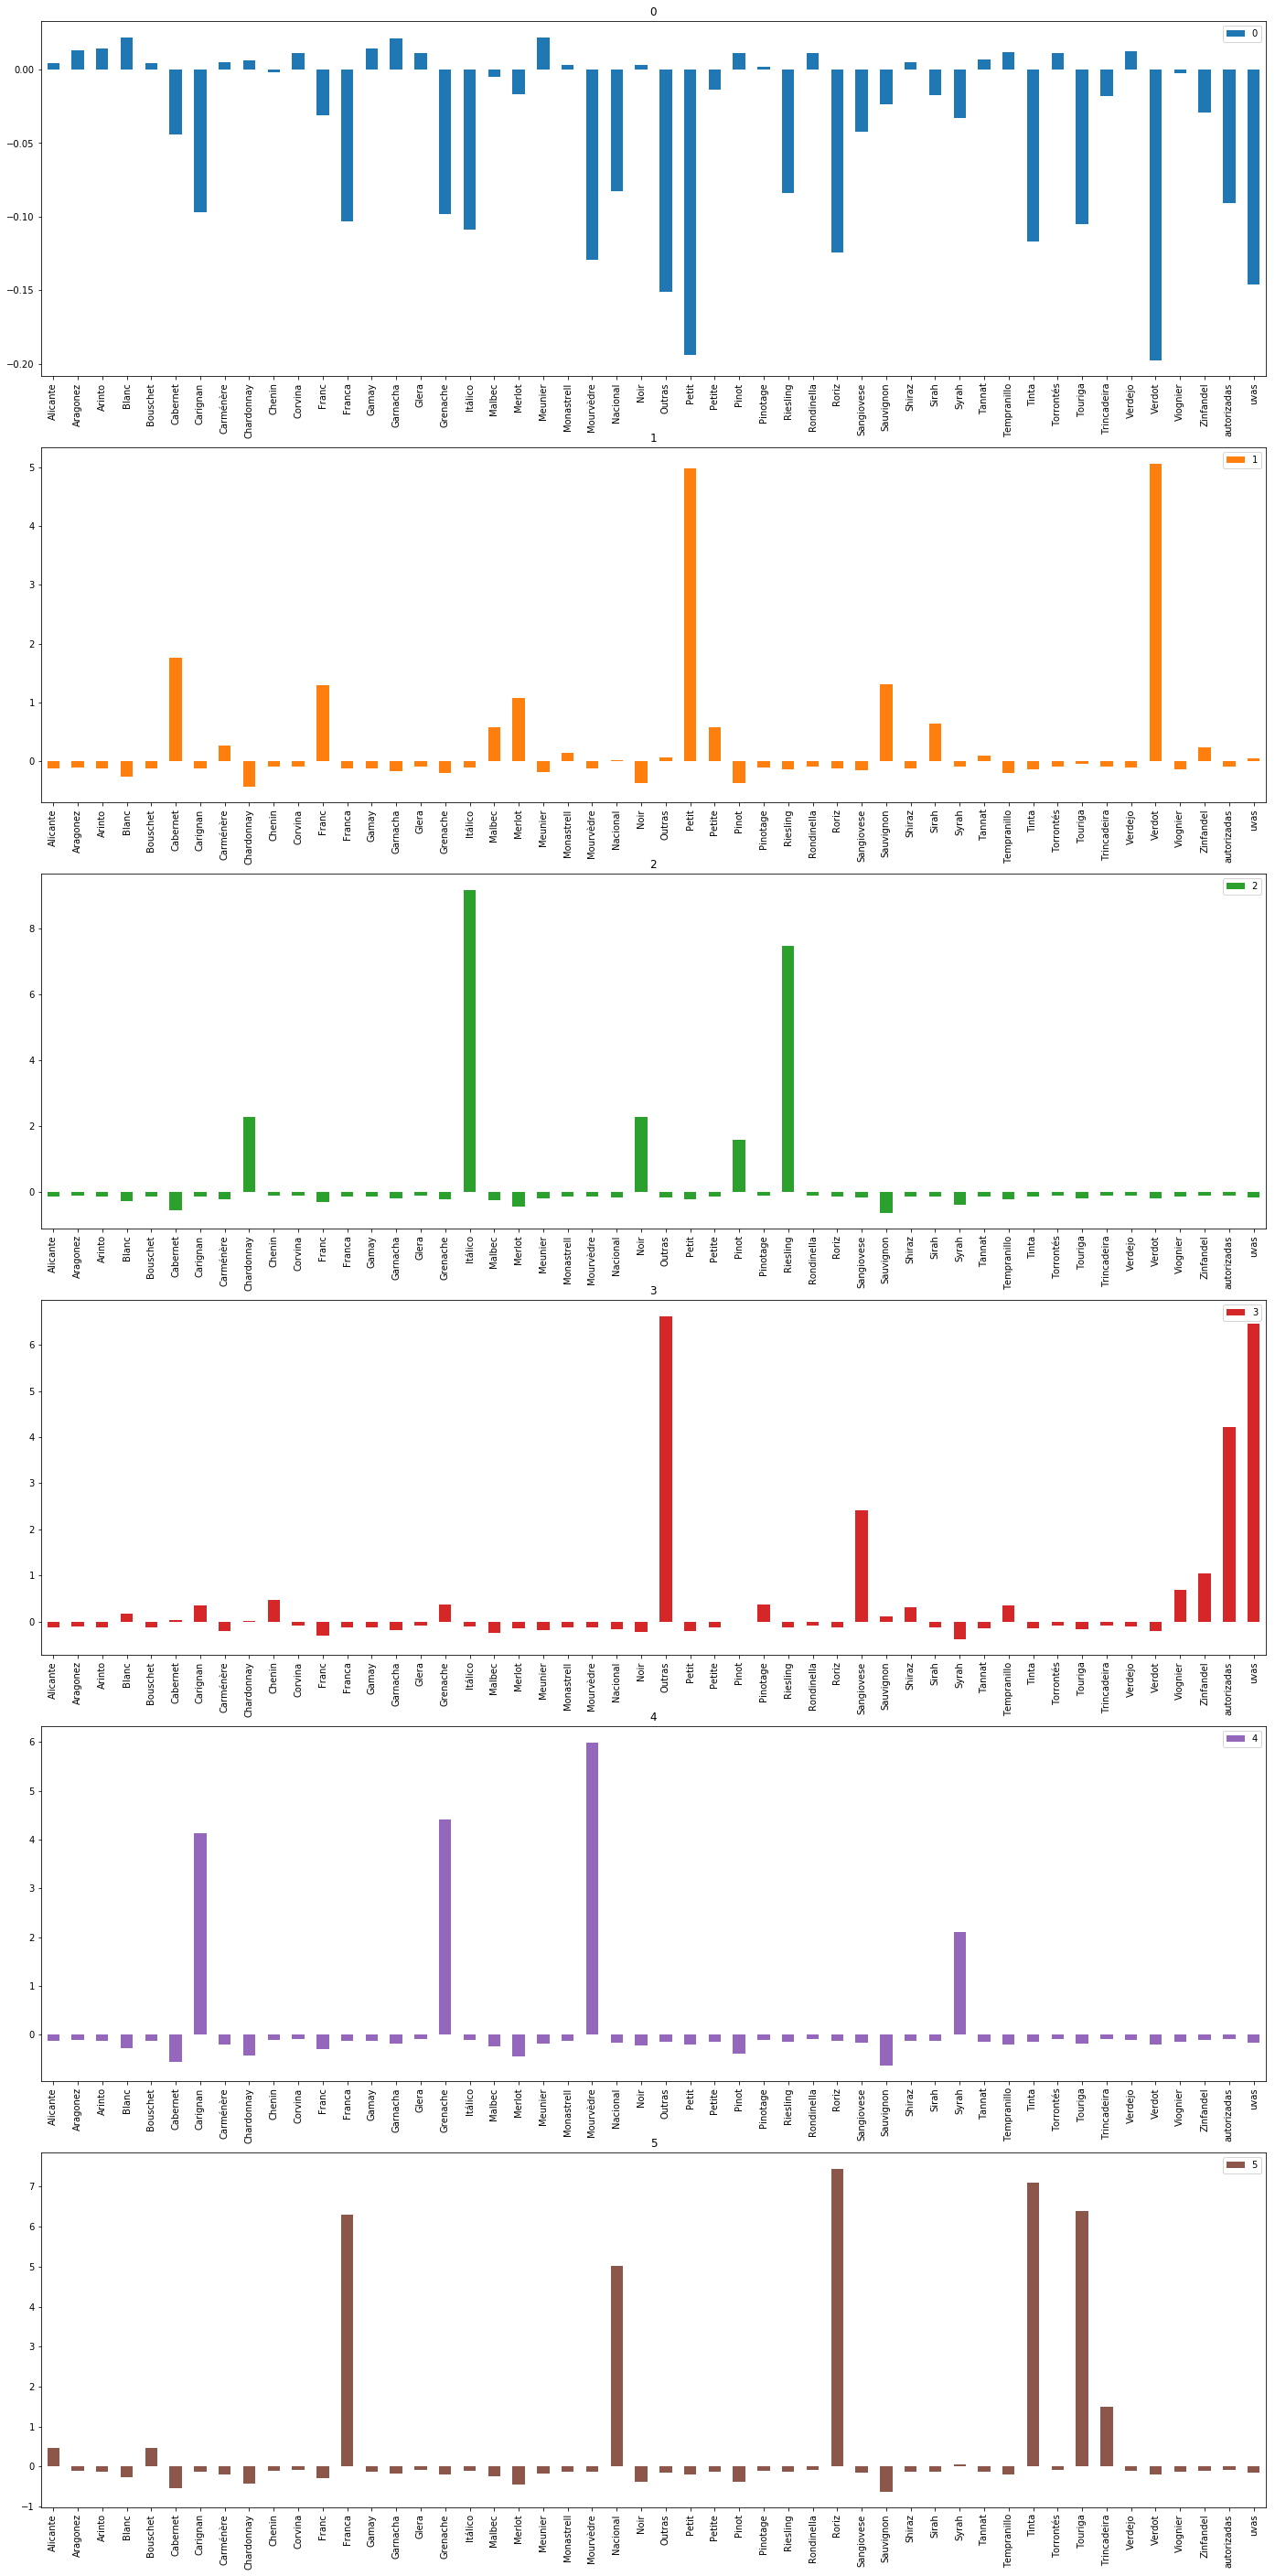

In [90]:
centers.plot.bar(subplots=True, figsize=(24,50), sharex=False)

In [91]:
for i in range(n_clusters):
    print('Center', i)
    print(centers[i].sort_values(ascending=False).head(10))
    print()

Center 0
Meunier        0.021857
Blanc          0.021814
Garnacha       0.021007
Arinto         0.014441
Gamay          0.014344
Aragonez       0.013167
Verdejo        0.012484
Tempranillo    0.011758
Corvina        0.011281
Pinot          0.011099
Name: 0, dtype: float64

Center 1
Verdot       5.065200
Petit        4.984825
Cabernet     1.758934
Sauvignon    1.312601
Franc        1.295035
Merlot       1.069325
Sirah        0.640857
Petite       0.579478
Malbec       0.569452
Carménère    0.265766
Name: 1, dtype: float64

Center 2
Itálico        9.181503
Riesling       7.474401
Noir           2.289113
Chardonnay     2.276271
Pinot          1.594424
Trincadeira   -0.090963
Glera         -0.090963
Torrontés     -0.090963
Rondinella    -0.090963
autorizadas   -0.090963
Name: 2, dtype: float64

Center 3
Outras         6.625310
uvas           6.453681
autorizadas    4.219663
Sangiovese     2.415073
Zinfandel      1.055444
Viognier       0.680740
Chenin         0.479072
Pinotage       0.3781

#### **Cluster 0**

In [92]:
ii = uva_cluster['Cluster'] == 0
ficha_df[ii].groupby(['pais', 'tipo'])['potencial_de_guarda_anos'].describe()

count       mean        std  min    25%   50%  \
pais           tipo                                                       
Alemanha       Branco       2.0   3.500000   0.707107  3.0   3.25   3.5   
               Tinto        2.0   5.500000   0.707107  5.0   5.25   5.5   
Argentina      Branco      22.0   3.954545   1.646852  2.0   3.00   4.0   
               Espumante    4.0   3.000000   0.000000  3.0   3.00   3.0   
               Rosé         3.0   3.000000   0.000000  3.0   3.00   3.0   
               Tinto       54.0   5.981481   2.536457  3.0   4.25   5.0   
Austrália      Branco       7.0   3.571429   0.786796  3.0   3.00   3.0   
               Tinto        7.0   5.000000   0.577350  4.0   5.00   5.0   
Brasil         Branco       1.0   3.000000        NaN  3.0   3.00   3.0   
               Espumante   13.0   4.307692   1.797434  2.0   3.00   4.0   
               Tinto        3.0   6.000000   2.645751  3.0   5.00   7.0   
Chile          Branco      29.0   3.758621   1.503690  2.0   3.00   3.0   
               Espumante    4.0   3.250000   0.500000  3.0   3.00   3.0   
               Rosé         5.0   3.400000   0.547723  3.0   3.00   3.0   
               Tinto       95.0   5.800000   2.703819  3.0   4.00   5.0   
China          Branco       2.0   3.500000   0.707107  3.0   3.25   3.5   
               Tinto        2.0   4.000000   0.000000  4.0   4.00   4.0   
Espanha        Branco      17.0   3.470588   0.514496  3.0   3.00   3.0   
               Espumante    9.0   3.222222   0.440959  3.0   3.00   3.0   
               Rosé         2.0   3.500000   0.707107  3.0   3.25   3.5   
               Tinto       71.0   6.056338   1.629087  3.0   5.00   6.0   
Estados Unidos Branco       7.0   4.285714   0.487950  4.0   4.00   4.0   
               Tinto       23.0   6.391304   1.587998  5.0   5.50   6.0   
França         Branco      32.0   5.531250   2.396023  2.0   4.00   5.0   
               Espumante   49.0   7.224490   7.150948  2.0   4.00   5.0   
               Rosé         5.0   3.600000   0.894427  2.0   4.00   4.0   
               Tinto       98.0   9.336735   6.589501  3.0   5.00   6.0   
Hungria        Branco       2.0   9.500000   7.778175  4.0   6.75   9.5   
Itália         Branco      15.0   4.533333   1.726543  3.0   4.00   4.0   
               Espumante   12.0   3.500000   0.522233  3.0   3.00   3.5   
               Frisante     4.0   1.750000   0.500000  1.0   1.75   2.0   
               Licoroso     5.0   7.200000   1.643168  5.0   6.00   8.0   
               Rosé         2.0   3.000000   0.000000  3.0   3.00   3.0   
               Tinto       42.0   6.833333   3.370725  4.0   5.00   6.0   
Nova Zelândia  Branco       1.0   6.000000        NaN  6.0   6.00   6.0   
               Tinto        1.0   6.000000        NaN  6.0   6.00   6.0   
Portugal       Branco      21.0   3.904762   1.997618  2.0   3.00   3.0   
               Espumante    4.0   3.250000   0.500000  3.0   3.00   3.0   
               Licoroso     3.0  26.000000  21.633308  8.0  14.00  20.0   
               Rosé         1.0   3.000000        NaN  3.0   3.00   3.0   
               Tinto       21.0   6.952381   2.765433  4.0   5.00   5.0   
Uruguai        Branco       6.0   3.500000   0.547723  3.0   3.00   3.5   
               Licoroso     1.0   5.000000        NaN  5.0   5.00   5.0   
               Tinto       17.0   5.823529   2.098669  2.0   5.00   5.0   
África do Sul  Branco       7.0   3.714286   1.496026  3.0   3.00   3.0   
               Espumante    1.0   5.000000        NaN  5.0   5.00   5.0   
               Licoroso     1.0   8.000000        NaN  8.0   8.00   8.0   
               Tinto       26.0   4.846154   1.189699  3.0   4.00   5.0   

                            75%   max  
pais           tipo                    
Alemanha       Branco      3.75   4.0  
               Tinto       5.75   6.0  
Argentina      Branco      4.00  10.0  
               Espumante   3.00   3.0  
               Rosé        3.00   3

### **Cluster 1**

In [93]:
ii = uva_cluster['Cluster'] == 1
ficha_df[ii].groupby(['pais', 'tipo'])['potencial_de_guarda_anos'].describe()

,,count,mean,std,min,25%,50%,75%,max
pais,tipo,,,,,,,,
Argentina,Tinto,2.0,9.000000,1.414214,8.0,8.50,9.0,9.5,10.0
Chile,Tinto,3.0,10.000000,5.000000,5.0,7.50,10.0,12.5,15.0
Espanha,Tinto,1.0,7.000000,NaN,7.0,7.00,7.0,7.0,7.0
Estados Unidos,Tinto,8.0,12.125000,6.998724,5.0,8.75,10.0,14.0,25.0
França,Tinto,13.0,21.692308,11.108440,7.0,20.00,20.0,25.0,50.0
Portugal,Tinto,1.0,10.000000,NaN,10.0,10.00,10.0,10.0,10.0
Uruguai,Tinto,1.0,6.000000,NaN,6.0,6.00,6.0,6.0,6.0
África do Sul,Tinto,3.0,8.000000,2.645751,6.0,6.50,7.0,9.0,11.0


In [94]:
ii = uva_cluster['Cluster'] == 2
ficha_df[ii].groupby(['pais', 'tipo'])['potencial_de_guarda_anos'].describe()

,,count,mean,std,min,25%,50%,75%,max
pais,tipo,,,,,,,,
Brasil,Espumante,10.0,4.1,1.286684,3.0,3.0,4.0,4.75,7.0


In [95]:
ii = uva_cluster['Cluster'] == 3
ficha_df[ii].groupby(['pais', 'tipo'])['potencial_de_guarda_anos'].describe()

count      mean       std  min   25%  50%   75%   max
pais           tipo                                                         
Chile          Branco    1.0  4.000000       NaN  4.0  4.00  4.0  4.00   4.0
               Tinto     1.0  4.000000       NaN  4.0  4.00  4.0  4.00   4.0
China          Tinto     1.0  6.000000       NaN  6.0  6.00  6.0  6.00   6.0
Estados Unidos Branco    3.0  4.000000  0.000000  4.0  4.00  4.0  4.00   4.0
               Rosé      2.0  3.500000  0.707107  3.0  3.25  3.5  3.75   4.0
               Tinto     1.0  4.000000       NaN  4.0  4.00  4.0  4.00   4.0
Itália         Tinto     7.0  6.428571  1.902379  5.0  5.00  6.0  7.00  10.0
África do Sul  Branco    1.0  3.000000       NaN  3.0  3.00  3.0  3.00   3.0
               Tinto     1.0  3.000000       NaN  3.0  3.00  3.0  3.00   3.0

In [99]:
ii = uva_cluster['Cluster'] == 4
ficha_df[ii].groupby(['pais', 'tipo', 'regiao'])['potencial_de_guarda_anos'].describe()

count  mean        std   min  \
pais          tipo  regiao                                                 
Chile         Tinto Valle del Maipo           1.0   5.0        NaN   5.0   
França        Rosé  Provence                  1.0   4.0        NaN   4.0   
              Tinto Cairanne                  1.0   7.0        NaN   7.0   
                    Châteauneuf-du-Pape       2.0  26.0  19.798990  12.0   
                    Corbières                 1.0   7.0        NaN   7.0   
                    Côtes du Rhône            2.0   6.5   2.121320   5.0   
                    La Clape                  2.0   7.0   1.414214   6.0   
                    Maury Sec                 1.0   5.0        NaN   5.0   
                    Minervois                 1.0   7.0        NaN   7.0   
                    Minervois-la-Livinière    1.0   8.0        NaN   8.0   
                    Roussillon                1.0   5.0        NaN   5.0   
                    Vallée du Rhône           2.0   7.5   2.121320   6.0   
África do Sul Tinto Coastal Region            2.0   6.0   0.000000   6.0   

                                              25%   50%    75%   max  
pais          tipo  regiao                                            
Chile         Tinto Valle del Maipo          5.00   5.0   5.00   5.0  
França        Rosé  Provence                 4.00   4.0   4.00   4.0  
              Tinto Cairanne                 7.00   7.0   7.00   7.0  
                    Châteauneuf-du-Pape     19.00  26.0  33.00  40.0  
                    Corbières                7.00   7.0   7.00   7.0  
                    Côtes du Rhône           5.75   6.5   7.25   8.0  
                    La Clape                 6.50   7.0   7.50   8.0  
                    Maury Sec                5.00   5.0   5.00   5.0  
                    Minervois                7.00   7.0   7.00   7.0  
                    Minervois-la-Livinière   8.00   8.0   8.00   8.0  
                    Roussillon               5.00   5.0   5.00   5.0  
                    Vallée du Rhône          6.75   7.5   8.25   9.0  
África do Sul Tinto Coastal Region           6.00   6.0   6.00   6.0

In [102]:
ii = uva_cluster['Cluster'] == 5
ficha_df[ii].groupby(['pais', 'tipo', 'regiao'])['temperatura'].describe()

count unique    top freq
pais     tipo  regiao                                 
Portugal Tinto Alentejo           1      1   9 °C    1
               Beira Interior     1      1  15 °C    1
               Douro              6      2  15 °C    4
               Dão                1      1  15 °C    1
               Tejo               5      2  15 °C    3

* **Qual é o número de clusters minimiza o erro?**

In [103]:
def KMeans_error(n_clusters, variable_scaled):
  model = KMeans(n_clusters=n_clusters)
  model.fit(variable_scaled)
  return [n_clusters, model.inertia_]

In [104]:
error_list = [KMeans_error(n_clusters, bag_rescaled) for n_clusters in range(1,41)]
inertia_data = pd.DataFrame(error_list, columns=['n_cluster', 'inertia'])

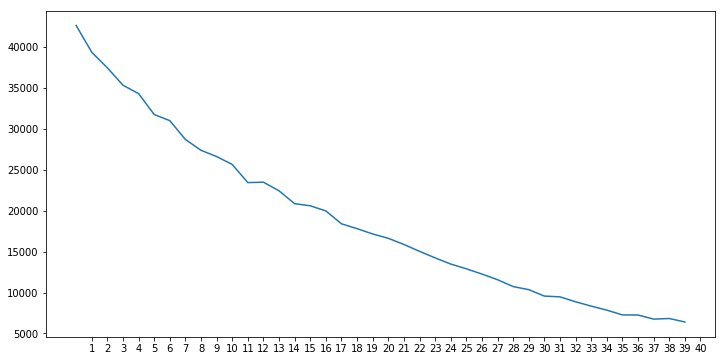

In [105]:
plt.figure(figsize=(12,6))
inertia_data.inertia.plot(xticks=inertia_data.n_cluster)

## **Teor alcoolico**

In [106]:
teor_alcool = []

for teor_string in ficha_df['teor_alcoolico']:
        teor_alcool.append(teor_string.strip('% ABV'))
        
teor_alcool = np.array(teor_alcool, 'float')
ficha_df['teor_alcoolico_num'] = teor_alcool

Text(0.5, 1.0, '')

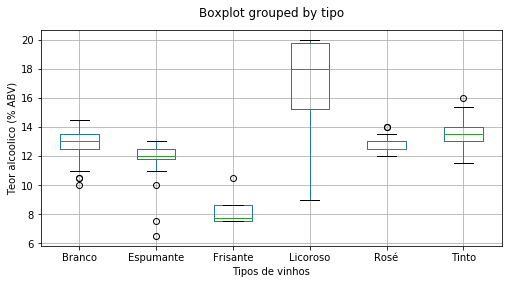

In [107]:
ficha_df.boxplot(['teor_alcoolico_num'], by=['tipo'], figsize=(8,4))
plt.xlabel('Tipos de vinhos')
plt.ylabel('Teor alcoolico (% ABV)')
plt.title('')

Text(0.5, 1.0, '')

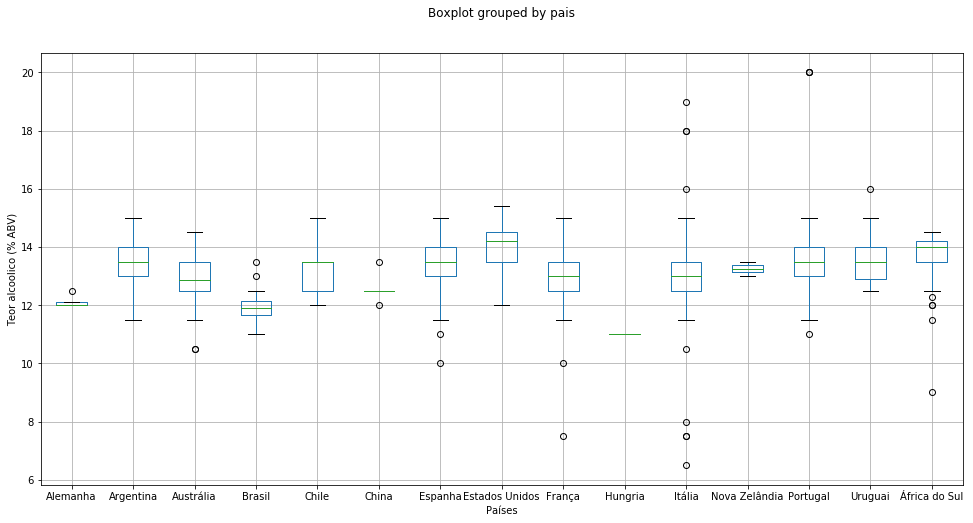

In [108]:
ficha_df.boxplot(['teor_alcoolico_num'], by=['pais'], figsize=(16,8))
plt.xlabel('Países')
plt.ylabel('Teor alcoolico (% ABV)')
plt.title('')

## **Temperatura**

In [109]:
temp = []

for temp_string in ficha_df['temperatura']:
        temp.append(temp_string.strip(' °C'))
        
temp = np.array(temp, 'int')
ficha_df['temperatura_num'] = temp

Text(0.5, 1.0, '')

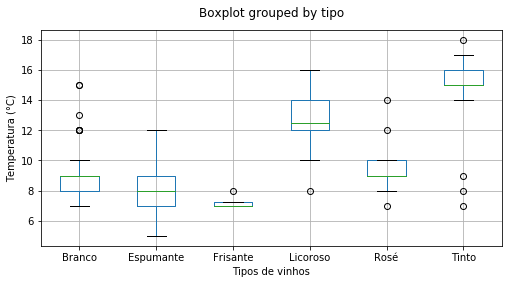

In [110]:
ficha_df.boxplot(['temperatura_num'], by=['tipo'], figsize=(8,4))
plt.xlabel('Tipos de vinhos')
plt.ylabel('Temperatura (°C)')
plt.title('')

Text(0.5, 1.0, '')

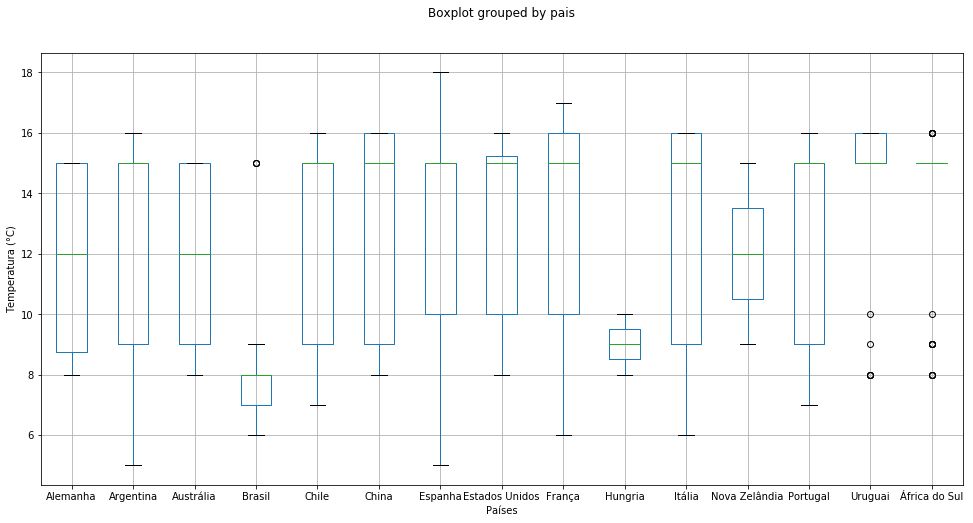

In [111]:
ficha_df.boxplot(['temperatura_num'], by=['pais'], figsize=(16,8))
plt.xlabel('Países')
plt.ylabel('Temperatura (°C)')
plt.title('')